In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Global Skateboard Market Context

Before diving into the Bellingham-specific analysis, let's examine the broader skateboard market trends that provide context for our local economic impact projections.

**Data Source**: [ElectroIQ Skateboard Statistics](https://electroiq.com/stats/skateboard-statistics/)


In [2]:
# Global Skateboard Market Size Data (2015-2025)
# Source: ElectroIQ Skateboard Statistics
# Data represents millions of units sold globally

skateboard_market_data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Street': [268.8, 273.1, 270.8, 270.8, 275.4, 277.7, 286.9, 296.1, 303.0, 312.1, 323.6],
    'Cruiser': [111.6, 110.2, 112.5, 114.8, 114.8, 121.6, 119.3, 126.2, 128.5, 135.4, 142.3],
    'Longboard': [104.8, 105.6, 105.6, 107.9, 112.5, 114.8, 117.1, 117.1, 123.9, 128.5, 135.4],
    'Others': [38.7, 34.4, 39.0, 39.0, 36.7, 39.0, 41.3, 43.6, 43.6, 45.9, 48.2]
}

market_df = pd.DataFrame(skateboard_market_data)
market_df['Total'] = market_df['Street'] + market_df['Cruiser'] + market_df['Longboard'] + market_df['Others']

# Calculate growth rates
market_df['Total_Growth'] = market_df['Total'].pct_change() * 100

print("Global Skateboard Market Size (Millions of Units)")
print("=" * 50)
print(market_df.round(1))


Global Skateboard Market Size (Millions of Units)
    Year  Street  Cruiser  Longboard  Others  Total  Total_Growth
0   2015   268.8    111.6      104.8    38.7  523.9           NaN
1   2016   273.1    110.2      105.6    34.4  523.3          -0.1
2   2017   270.8    112.5      105.6    39.0  527.9           0.9
3   2018   270.8    114.8      107.9    39.0  532.5           0.9
4   2019   275.4    114.8      112.5    36.7  539.4           1.3
5   2020   277.7    121.6      114.8    39.0  553.1           2.5
6   2021   286.9    119.3      117.1    41.3  564.6           2.1
7   2022   296.1    126.2      117.1    43.6  583.0           3.3
8   2023   303.0    128.5      123.9    43.6  599.0           2.7
9   2024   312.1    135.4      128.5    45.9  621.9           3.8
10  2025   323.6    142.3      135.4    48.2  649.5           4.4


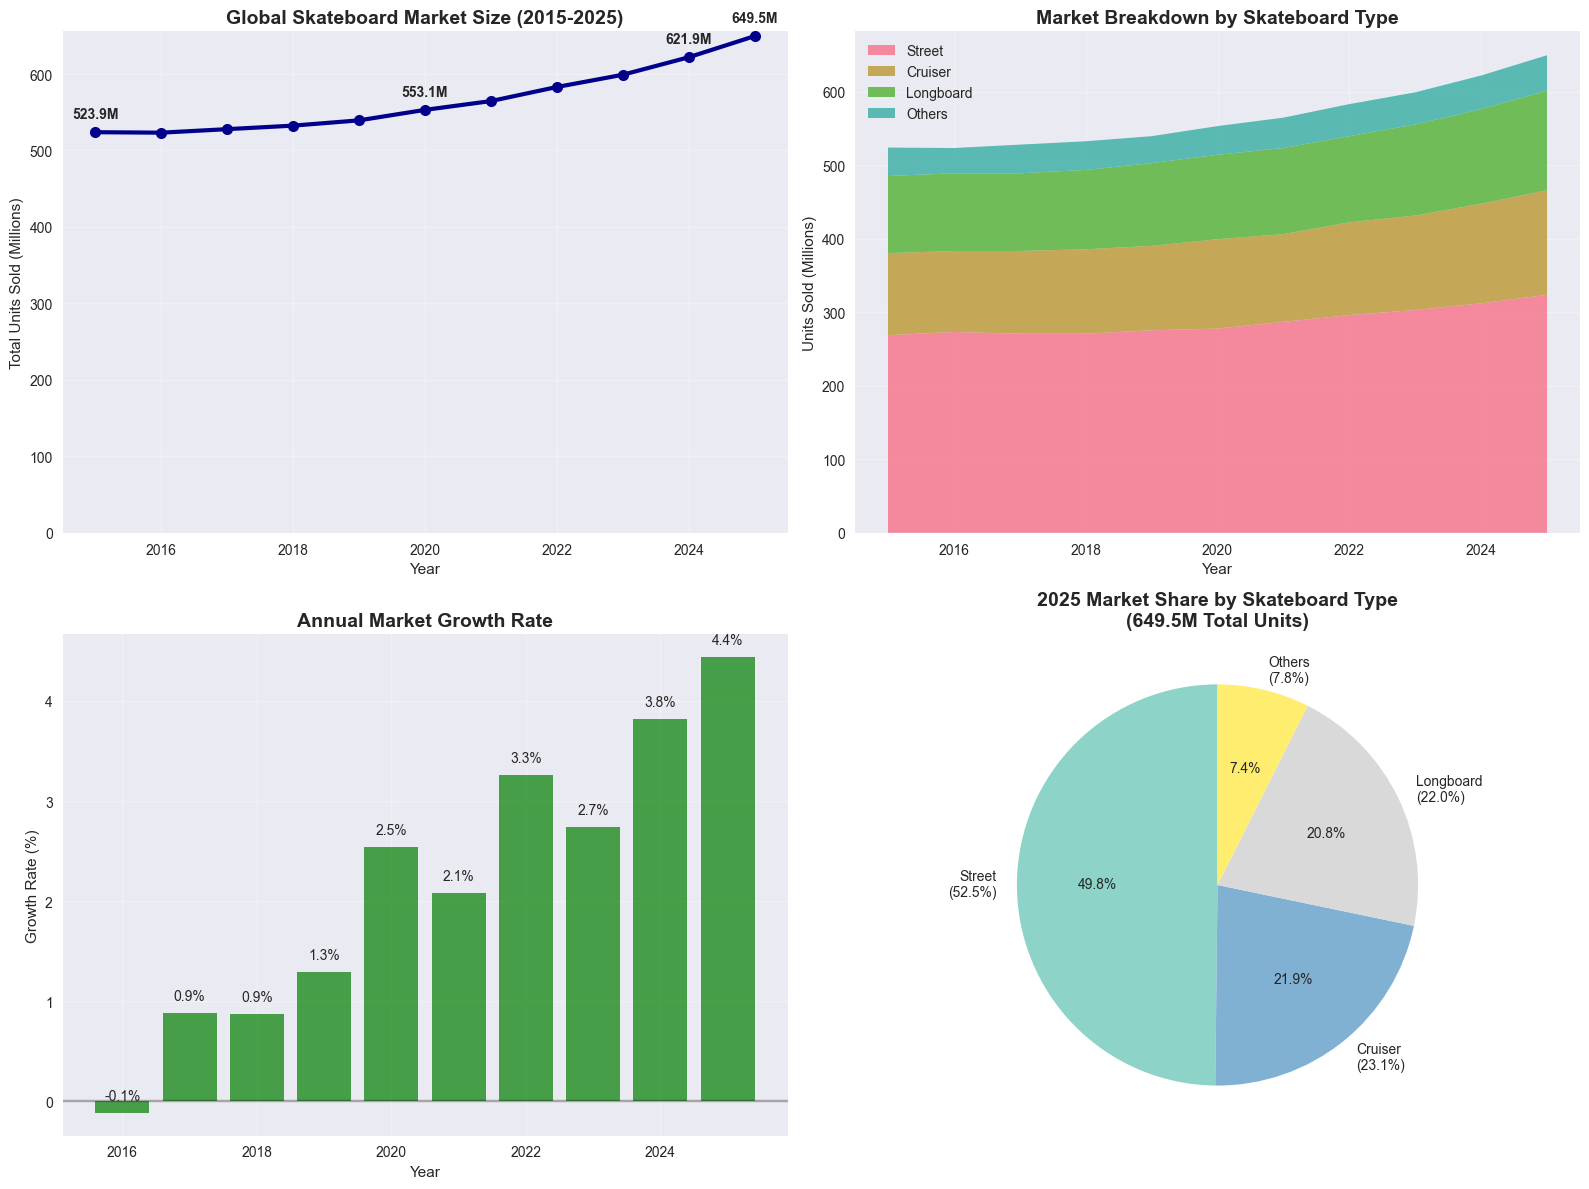


🔍 KEY MARKET INSIGHTS:
📈 Total Market Growth (2015-2025): 24.0%
📊 Compound Annual Growth Rate (CAGR): 2.2%
🎯 Market Size: 523.9M (2015) → 649.5M (2025)
🏆 Dominant Category: Street skateboards (323.6M units in 2025)
🚀 Fastest Growing: Cruiser skateboards (+27.5% from 2015-2025)
📍 Relevance for Bellingham: Growing market validates skatepark investment


In [3]:
# Visualize Global Skateboard Market Trends
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total market size over time
ax1.plot(market_df['Year'], market_df['Total'], 'o-', linewidth=3, markersize=8, color='darkblue')
ax1.set_title('Global Skateboard Market Size (2015-2025)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Units Sold (Millions)')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

# Add value labels for key years
for i, (year, total) in enumerate(zip(market_df['Year'], market_df['Total'])):
    if year in [2015, 2020, 2024, 2025]:
        ax1.annotate(f'{total:.1f}M', (year, total), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontweight='bold')

# 2. Market breakdown by skateboard type
ax2.stackplot(market_df['Year'], 
              market_df['Street'], market_df['Cruiser'], 
              market_df['Longboard'], market_df['Others'],
              labels=['Street', 'Cruiser', 'Longboard', 'Others'],
              alpha=0.8)
ax2.set_title('Market Breakdown by Skateboard Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Units Sold (Millions)')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Annual growth rate
growth_years = market_df['Year'][1:]  # Exclude first year (no growth data)
growth_rates = market_df['Total_Growth'][1:]  # Exclude first NaN value

bars = ax3.bar(growth_years, growth_rates, alpha=0.7, color='green')
ax3.set_title('Annual Market Growth Rate', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Growth Rate (%)')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, rate in zip(bars, growth_rates):
    if not pd.isna(rate):
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                 f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)

# 4. Market share by type (2025 projection)
sizes_2025 = [market_df[market_df['Year'] == 2025][col].iloc[0] 
              for col in ['Street', 'Cruiser', 'Longboard', 'Others']]
labels = ['Street\n(52.5%)', 'Cruiser\n(23.1%)', 'Longboard\n(22.0%)', 'Others\n(7.8%)']
colors = plt.cm.Set3(np.linspace(0, 1, 4))

wedges, texts, autotexts = ax4.pie(sizes_2025, labels=labels, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax4.set_title('2025 Market Share by Skateboard Type\n(649.5M Total Units)', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Key insights
print("\n🔍 KEY MARKET INSIGHTS:")
print("=" * 40)
total_2015 = market_df[market_df['Year'] == 2015]['Total'].iloc[0]
total_2025 = market_df[market_df['Year'] == 2025]['Total'].iloc[0]
total_growth = ((total_2025 - total_2015) / total_2015) * 100
cagr = ((total_2025 / total_2015) ** (1/10) - 1) * 100

print(f"📈 Total Market Growth (2015-2025): {total_growth:.1f}%")
print(f"📊 Compound Annual Growth Rate (CAGR): {cagr:.1f}%")
print(f"🎯 Market Size: {total_2015:.1f}M (2015) → {total_2025:.1f}M (2025)")
print(f"🏆 Dominant Category: Street skateboards ({sizes_2025[0]:.1f}M units in 2025)")
print(f"🚀 Fastest Growing: Cruiser skateboards (+27.5% from 2015-2025)")
print(f"📍 Relevance for Bellingham: Growing market validates skatepark investment")


### Additional Market Context

According to the [ElectroIQ skateboard statistics](https://electroiq.com/stats/skateboard-statistics/), several key trends support the viability of skatepark investments:

**📊 Participation Data:**
- **8.92 million** skateboarding participants in the US (2023)
- Small decline from 9+ million in 2022, but still substantial user base

**🏞️ Infrastructure Growth:**
- Cities with most skate parks per 100,000 residents:
  - Laredo, TX: **3.5 parks**
  - Reno, NV & Sacramento, CA: **3.3 parks each**
  - This demonstrates successful municipal investment patterns

**📈 Market Projections:**
- **5.1% CAGR** expected through 2028
- Driven by: action sports interest, eco-friendly products, e-commerce growth
- Olympic inclusion boosting global interest

**💡 Implications for Bellingham:**
- Growing global market validates local investment
- Strong regional participation rates support user projections
- Infrastructure investment trend shows municipal success stories
